<a href="https://colab.research.google.com/github/vladcioaba/vault/blob/main/SimilaritySearchInTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
path_content = os.getcwd()
path_data = path_content + '/data'
path_query = path_content + '/query'
print(path_query)
print(path_data)

if not os.path.exists(path_data):
  os.mkdir(path_data) 

if not os.path.exists(path_query):
  os.mkdir(path_query) 

/content/query
/content/data


In [84]:
#UPLOAD HISTORICAL DATA
import pandas as pd
from google.colab import files
import glob

f_path = glob.glob(path_data + '/*')
for f in f_path:
    os.remove(f)

i_pwd = os.getcwd()
os.chdir(path_data)
uploaded = files.upload()
if uploaded:
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.chdir(i_pwd)

Saving AAL.csv to AAL.csv
Saving AAPL.csv to AAPL.csv
Saving CCL.csv to CCL.csv
Saving GOOGL.csv to GOOGL.csv
Saving IVR.csv to IVR.csv
Saving MUR.csv to MUR.csv
Saving NCLH.csv to NCLH.csv
Saving NIO.csv to NIO.csv
Saving TSLA.csv to TSLA.csv
Saving WDI.DU.csv to WDI.DU.csv
b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-01-02,28.980000,29.299999,28.650000,29.090000,28.982893,6451100\n2020-01-03,28.270000,28.290001,27.340000,27.650000,27.548195,14008900\n2020-01-06,27.190001,27.490000,27.080000,27.320000,27.219410,6105800\n2020-01-07,27.559999,27.680000,27.059999,27.219999,27.119778,6105900\n2020-01-08,27.100000,28.090000,27.070000,27.840000,27.737495,10496800\n2020-01-09,28.090000,28.230000,27.709999,27.950001,27.847092,6898900\n2020-01-10,27.959999,27.990000,27.250000,27.320000,27.219410,8106800\n2020-01-13,27.320000,27.530001,27.160000,27.389999,27.289152,5874400\n2020-01-14,27.910000,28.400000,27.350000,27.530001,27.428638,8888900\n2020-01-15,27.450001,28.059999,27.320000,27.580

In [87]:
import glob

files_data = glob.glob(path_data + '/' + "*.csv")
print('Loading ' + path_data + ' ' + str(files_data))

series = []
for f in files_data:
  data = pd.read_csv(f)
  data = data.dropna()
  data['Avg'] = data['Open'] + (data['High'] - data['Low']) / 2
  #print(data.isna().sum())
  symbol_str = ''.join(f.split('/')[-1].split('.')[:-1])
  series.append({'symbol':symbol_str, 'data': data } )

Loading /content/data ['/content/data/NIO.csv', '/content/data/CCL.csv', '/content/data/TSLA.csv', '/content/data/AAPL.csv', '/content/data/WDI.DU.csv', '/content/data/AAL.csv', '/content/data/GOOGL.csv', '/content/data/MUR.csv', '/content/data/IVR.csv', '/content/data/NCLH.csv']


In [29]:
# UPLOAD QUERY DATA
import pandas as pd
from google.colab import files
import glob

f_path = glob.glob(path_query + '/*')
for f in f_path:
    os.remove(f)

i_pwd = os.getcwd()
os.chdir(path_query)
uploaded = files.upload()
if uploaded:
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.chdir(i_pwd)


Saving query.csv to query.csv
User uploaded file "query.csv" with length 2903 bytes


In [30]:
import glob

files_query = glob.glob(path_query + '/' + "*.csv")
print('Loading ' + str(files_query))

query_data = pd.read_csv(files_query[0])

query_data['Avg'] = query_data['Open'] + (query_data['High'] - query_data['Low']) / 2
query = list(query_data['Avg'].values)


Loading ['/content/query/query.csv']


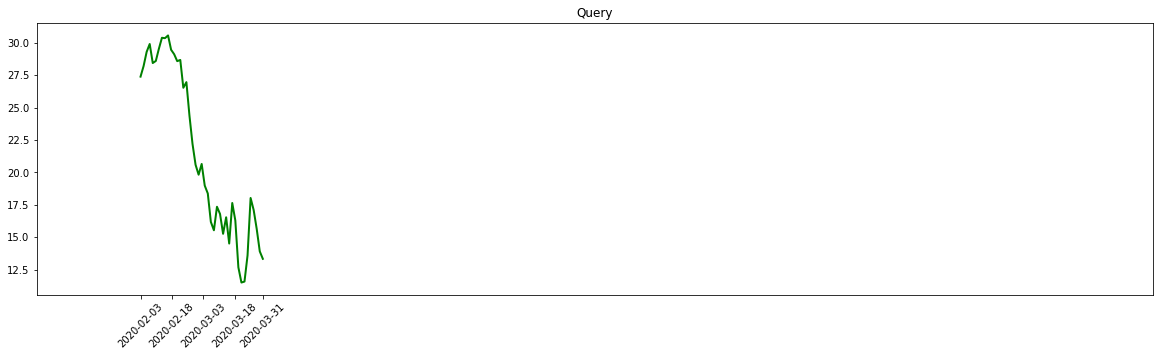

In [244]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

x_len = len(query_data['Date'])

fig = plt.figure(figsize=(20,5))
plt.title('Query')
plt.plot(query_data['Date'], query_data['Avg'], linewidth=2, c='g')
plt.xticks([0, x_len / 4, x_len / 2, 3 * x_len / 4, x_len - 1], rotation = 45)
plt.xlim(-34, 331)
plt.show()

In [32]:
!git clone https://github.com/tylerwmarrs/mass-ts.git && cd mass-ts && pip install -r requirements.txt
%cd mass-ts

Cloning into 'mass-ts'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 75.44 KiB | 2.79 MiB/s, done.
Resolving deltas: 100% (97/97), done.
     |████████████████████████████████| 17.4MB 1.2MB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.6 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.16.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
/content/mass-ts


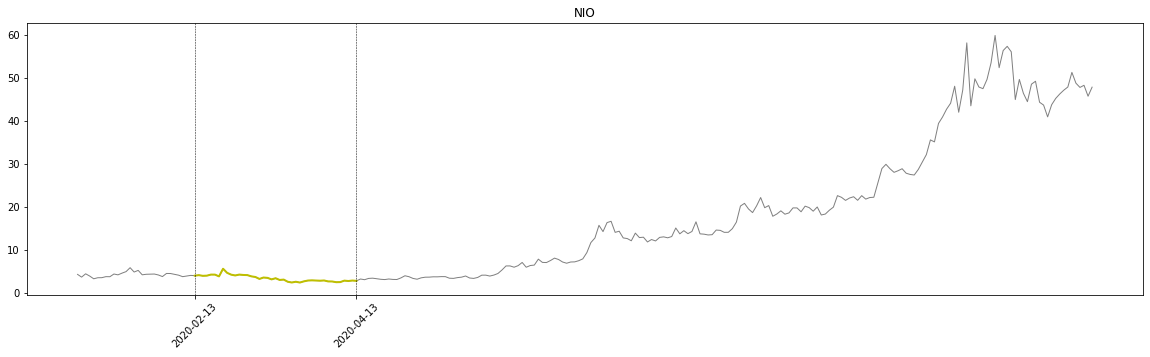

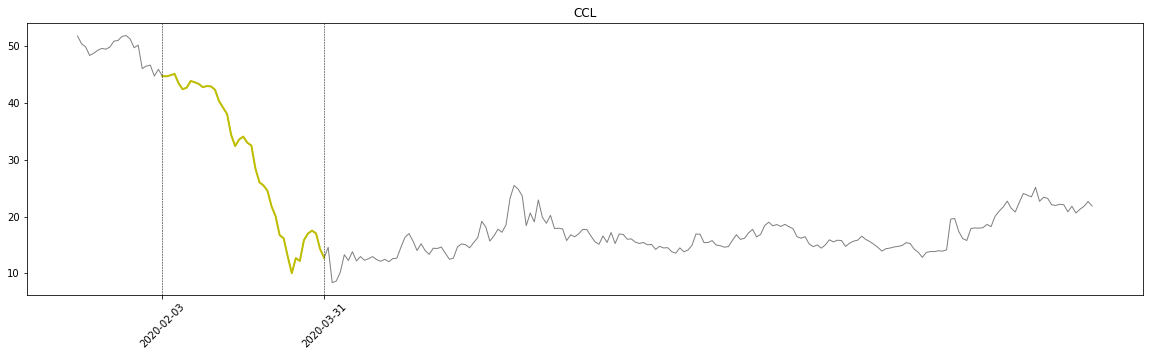

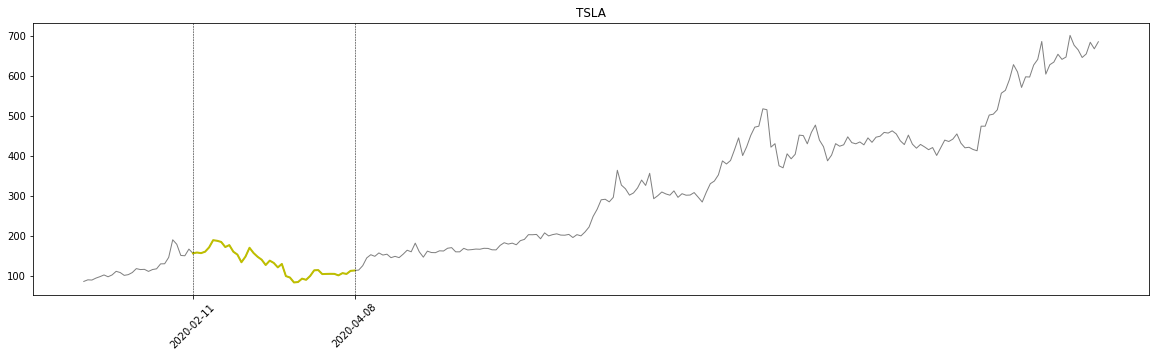

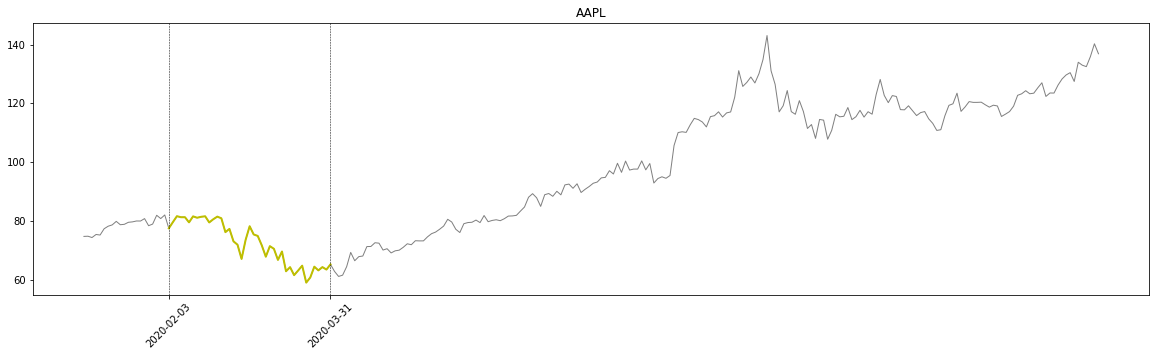

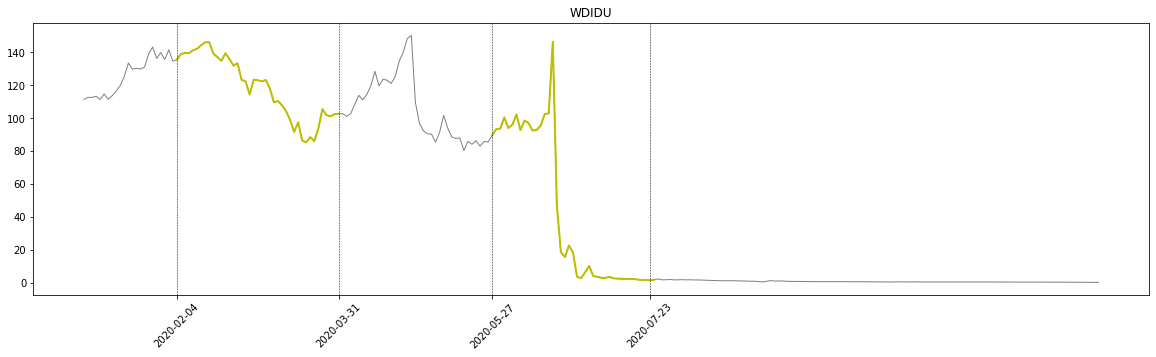

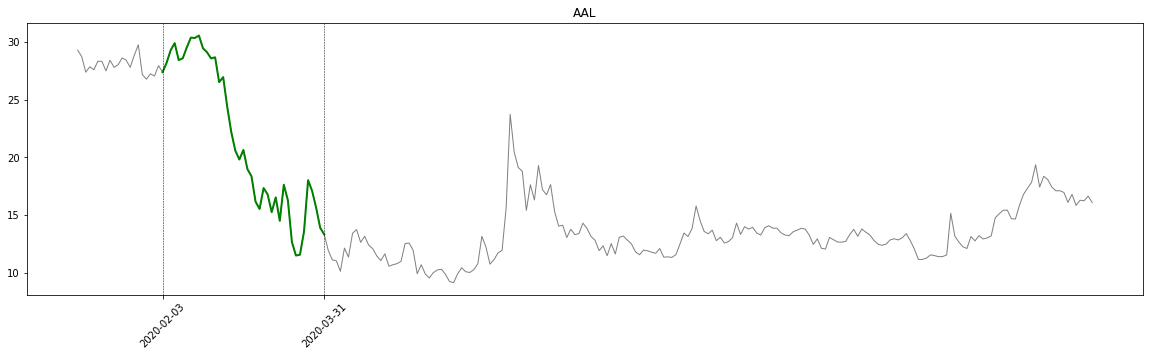

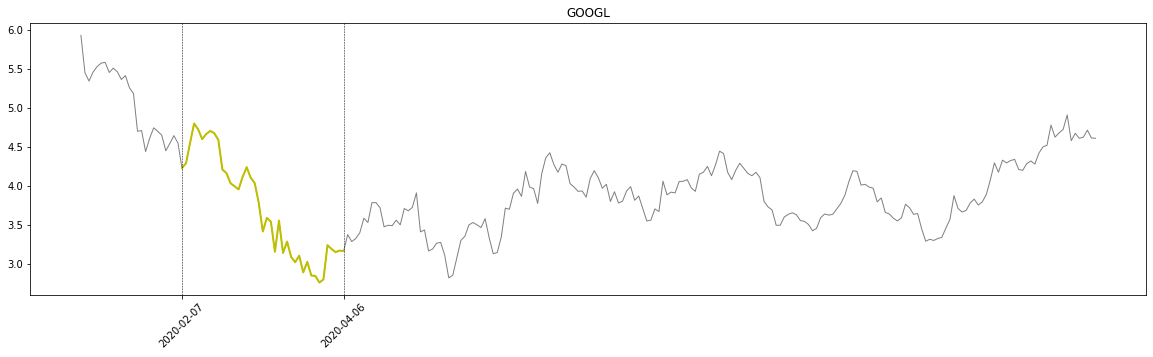

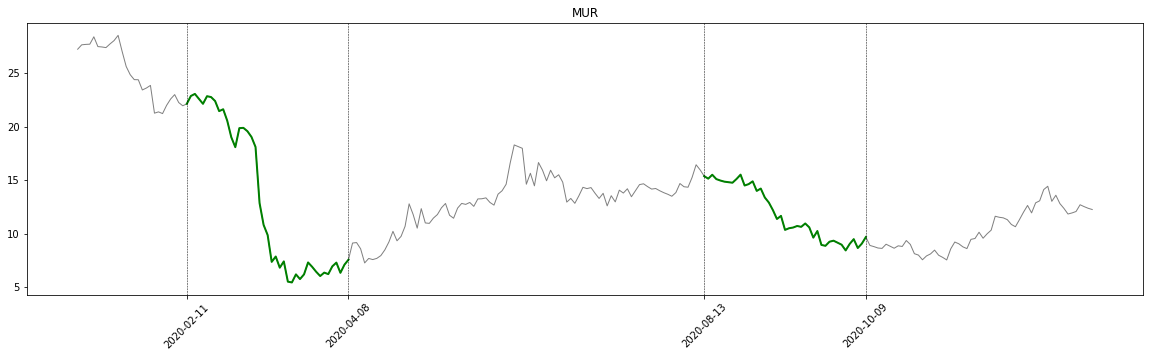

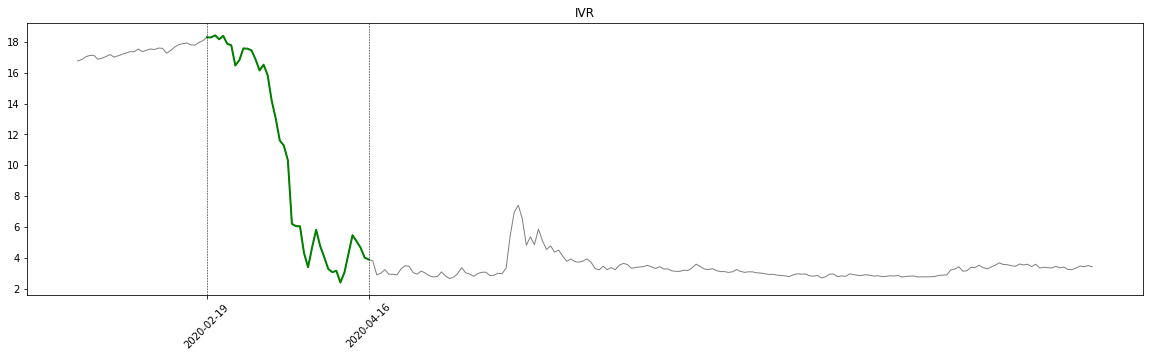

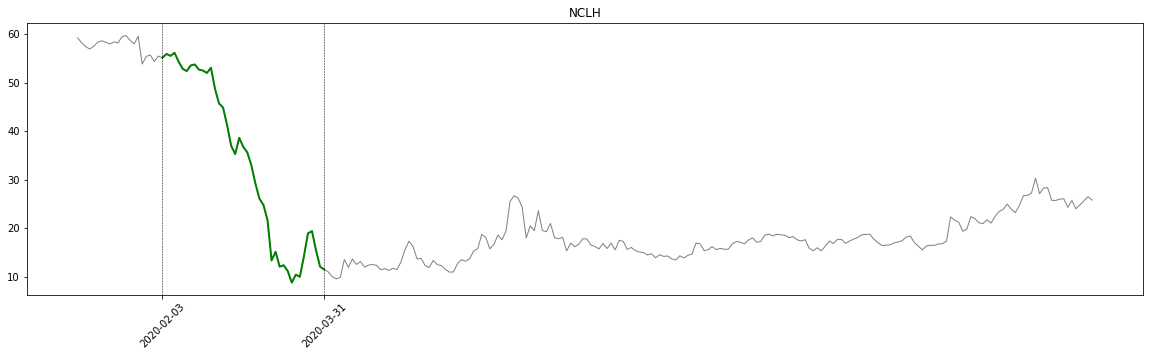

In [267]:
import numpy as np
import mass_ts as mts
from mass_ts.core import precheck_series_and_query
import matplotlib.pyplot as plt
import time
import datetime

def min_subsequence_distance(values):
    iteration, batch_size, subsequence, query = values
    distances = mts.mass2(subsequence, query)

    # find mininimum index of this batch which will be between 0 and batch_size
    min_idx = np.argmin(distances)

    # add this distance to best distances
    dist = distances[min_idx]

    # compute the actual index and store it
    index = min_idx + iteration

    return (index, dist)

def batch_job_generator(ts, query, indices, batch_size):
    for iteration, i in enumerate(indices):
        subsequence = ts[i:i+batch_size]
        yield (iteration, batch_size, subsequence, query)

def compute_similarities(ts, query):
  # parameter validation
  ts, query = precheck_series_and_query(ts, query)

  n = len(ts)
  batch_size = len(query)
  matches = []    
  
  # generate indices to process over given batch size
  indices = list(range(0, n - batch_size))
  
  # determine if we are multiprocessing or not based on cpu_count
  for values in batch_job_generator(ts, query, indices, batch_size):
      matches.append(min_subsequence_distance(values))
  
  # grab the indices and distances
  matches = np.array(matches)
  
  # find the best K number of matches
  # distance is in column 1
  top_matches = min(len(matches), 6)
  top_indices = np.argpartition(matches[:, 1], top_matches)[0:top_matches]
  
  # ignore the warning when casting the index values back to ints
  # to store all values it had to choose complex types to handle the
  # distances
  with np.warnings.catch_warnings():
    np.warnings.filterwarnings(
        'ignore',
        r'Casting complex values to real discards the imaginary part'
    )
    best_indices = matches[:, 0][top_indices].astype('int64')
  best_dists = matches[:, 1][top_indices]

  return (best_indices, best_dists)

for obj in series:
  data = obj['data']
  symbol_str = obj['symbol'] 
  ts = list(data['Avg'].values)
  data_len = len(data['Date'])
  
  plt.figure(figsize=(20,5))
  plt.title(symbol_str)
  plt.plot(data['Date'], data['Avg'], linewidth=1, c='gray')

  try:
    indices, distances = compute_similarities(ts, query)
  except Exception as error:
    print(error)
    pass

  # find minimums
  indices_filtered = []
  distances_filtered = []
  i_len = len(indices)
  batch_size = len(query)
  if i_len:
    matches = sorted(zip(indices, distances), key=lambda x: x[0])
    indices_filtered.append(matches[0][0])
    distances_filtered.append(matches[0][1])
    dfm = "%Y-%m-%d"
    for i in range(0, i_len):
      # print(str(matches[i][0]))
      # print(data['Date'][matches[i][0]])
      # print(data['Date'][indices_filtered[-1]])
      t2 = time.mktime(datetime.datetime.strptime(data['Date'][matches[i][0]], dfm).timetuple()) / 86400.0
      t1 = time.mktime(datetime.datetime.strptime(data['Date'][indices_filtered[-1]], dfm).timetuple()) / 86400.0
      if abs(t2 - t1) < batch_size: # vecinity treshold
        #print(str(t2 - t1))
        if matches[i][1] < distances_filtered[-1]:
          indices_filtered[-1] = matches[i][0]
          distances_filtered[-1] = matches[i][1]
      else:
        indices_filtered.append(matches[i][0])
        distances_filtered.append(matches[i][1])

    #print(indices_filtered)
    #print(distances_filtered)
    x_ticks = []
    for idx, dist in zip(indices_filtered, distances_filtered):
      color = 'g' if dist < 2 else ('y' if dist < 3 else 'r')
      plt.plot(data['Date'][idx:idx+batch_size], data['Avg'][idx:idx+batch_size], linewidth=2, c=color)
      plt.axvline(x=data['Date'][idx], color='k', linewidth=0.5, linestyle='--')
      plt.axvline(x=data['Date'][idx + batch_size-1], color='k', linewidth=0.5, linestyle='--')
      x_ticks.append(data['Date'][idx])
      x_ticks.append(data['Date'][idx + batch_size-1])

    if len(x_ticks):
      plt.xticks(x_ticks, rotation = 45)

  plt.show()
